# Association Rules

Let's say you are a Machine Learning engineer working for a clothing company and you want to adopt new strategies to improve the company's profit.
Use this dataset and the association rules mining to find new marketing plans. 
Note here that one of the strategies can be based on which items should be put together

In [86]:
# importing  packages
import pandas as pd
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder

# making data frame from csv file 

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

df=dataset 

In [3]:
df

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Installation of graphviz

In [2]:
# Mlxtend is a Python library containing useful tools for the day-to-day data science tasks.

import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
os.environ["PATH"] += os.pathsep + 'D:/mlxtend-0.19.0/mlxtend'

In [16]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


# Visualization 

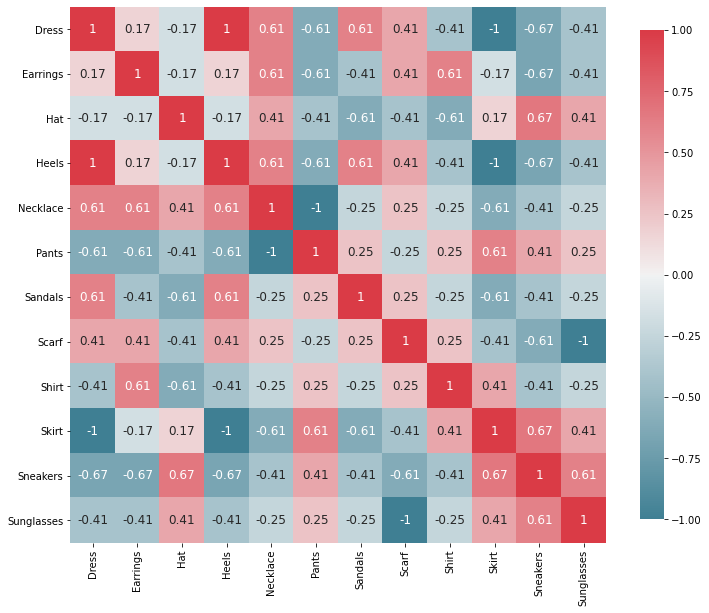

In [37]:
# Observations:
#Sneakers has some positive correlation with Skirt, Hat and Fare
#Sneakers has some negative correlation with Dress, Earrings, Scarf and Heels
#Necklace has some positive correlation with Dress, Earrings and Heels
#Pants has some negative correlation with Dress, Earrings and Heels

import matplotlib.pyplot as plt

def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = {'fontsize':12 }
        )

plot_correlation_map(df)

<AxesSubplot:xlabel='Dress', ylabel='count'>

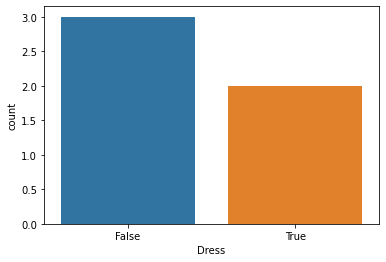

In [38]:
# Dress
sns.countplot(x='Dress',data=df)

<AxesSubplot:xlabel='Scarf', ylabel='count'>

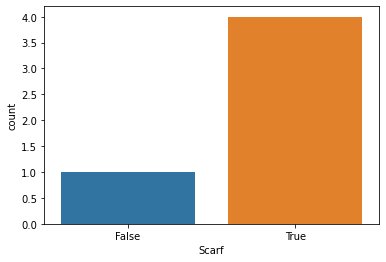

In [40]:
# Scarf
sns.countplot(x='Scarf',data=df)

<AxesSubplot:xlabel='Pants', ylabel='Scarf'>

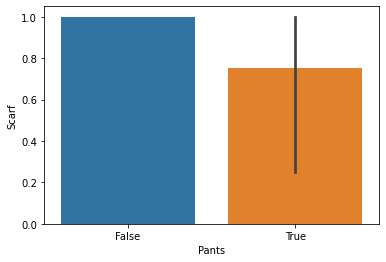

In [41]:
sns.barplot(x='Pants',y="Scarf",data=df)

# Apriori Preparation

In [4]:
# Apriori Library
# To understand the Apriori algorithm we are going to try it out together on a dataset, but first, we have to install the right library:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df).transform(df)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# Support Code

Support how frequent an item-set is in all transactions. The ratio of the number of transactions in which item x appears to the total number of transactions.
Let’s select itemsets with a minimum of 60% Support
Apriori returns by default the column indice of the item .For example (2) means Hat.

In [11]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


# Support with column names

In [25]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


# Confidence Code

Confidence how likely items are purchased together. The likelihood of item y being purchased when the item x is purchased.
In case we want to extract rules based on other metrics like confidence, we can use association_rules from mlxtend.frequent_patterns library.

In [29]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6) # associate itemsets with confidence over 70%

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


# Lift code

Associating based on Lift
Lift how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

In [32]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


lift > 1  ===>  It's more likely to use a new association to find the new strategy marketing (Skirt and Pants)
rather than Skirt alone or Pants alone


# Let's do the same checkpoint but with a bigger dataset

Market basket optimisation is a technique used by retailers to find patterns in customer behaviour based on their history of transactions. If a customer purchased item A what is the probability that the customer is buying item B along with it?
With Market Basket Analysis (MBA) we will discover what items are more or less likely to be bought together.
This dataset contains a total of 7501 transaction records where each record consists of the list of items sold in one transaction. Using this record of transactions and items in each transaction, we will find the association rules between items.

In [101]:
# importing  packages
import pandas as pd
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder

# making data frame from csv file 
df1=pd.read_csv('Market_Basket_Optimisation.csv', sep=',')

In [95]:
df1

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Checking the data type 
print(df1.dtypes)

shrimp                object
almonds               object
avocado               object
vegetables mix        object
green grapes          object
whole weat flour      object
yams                  object
cottage cheese        object
energy drink          object
tomato juice          object
low fat yogurt        object
green tea             object
honey                 object
salad                 object
mineral water         object
salmon                object
antioxydant juice     object
frozen smoothie       object
spinach               object
olive oil            float64
dtype: object


In [96]:
df1.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [102]:
# We can replace the missing values with the most frequent value by using the fillna() function
df1["avocado"].fillna("mineral water", inplace=True)
df1["vegetables mix"].fillna("mineral water", inplace=True)
df1["green grapes"].fillna("green tea", inplace=True)
df1["whole weat flour"].fillna("french fries", inplace=True)
df1["yams"].fillna("green tea", inplace=True)
df1["cottage cheese"].fillna("green tea", inplace=True)
df1["energy drink"].fillna("green tea", inplace=True)
df1["tomato juice"].fillna("green tea", inplace=True)
df1["low fat yogurt"].fillna("green tea", inplace=True)
df1["green tea"].fillna("green tea", inplace=True)
df1["honey"].fillna("green tea", inplace=True)
df1["salad"].fillna("green tea", inplace=True)
df1["mineral water"].fillna("magazines", inplace=True)
df1.drop(['salmon',"antioxydant juice", "frozen smoothie", "spinach", "olive oil"], 1, inplace=True)


# Data Preparation
To apply Apriori machine learning algorithm, first we need to make some changes on the dataset.

In [103]:
# The following code transforms our dataset into a list of transactions.

import numpy as np
# making each customers shopping items an identical list
# Converting the data frame into a list of lists 
trans = []
data=df1
# df1.values.tolist()

for i in range(0, 7500):
    trans.append([str(data.values[i,j]) for j in range(0, 15)])

#for i in range(len(data)):
    #trans.append([str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!='nan'])
    
# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7500, 15)


In [104]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
data.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Support with column names

Below is the code that trains our apriori model.

In [113]:
#Now, let us return the items and itemsets with at least 80% support:
apriori(data, min_support = 0.8, use_colnames = True)

,support,itemsets
0,0.819200,(french fries)
1,0.995867,(green tea)
2,0.997200,(magazines)
3,0.817467,"(french fries, green tea)"
4,0.818000,"(french fries, magazines)"
5,0.995333,"(green tea, magazines)"
6,0.817200,"(french fries, green tea, magazines)"


In [114]:
#frequent_itemsets=apriori(data, min_support=0.8, use_colnames=True) #Instead of column indices we can use column names.
#frequent_itemsets
frequent_itemsets = apriori(data, min_support = 0.8, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.819200,(french fries),1
1,0.995867,(green tea),1
2,0.997200,(magazines),1
3,0.817467,"(french fries, green tea)",2
4,0.818000,"(french fries, magazines)",2
5,0.995333,"(green tea, magazines)",2
6,0.817200,"(french fries, green tea, magazines)",3


# Confidence Code

In [115]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.8) # associate itemsets with confidence over 80%


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(french fries),(green tea),0.819200,0.995867,0.817467,0.997884,1.002026,0.001653,1.953477
1,(green tea),(french fries),0.995867,0.819200,0.817467,0.820860,1.002026,0.001653,1.009264
2,(french fries),(magazines),0.819200,0.997200,0.818000,0.998535,1.001339,0.001094,1.911467
3,(magazines),(french fries),0.997200,0.819200,0.818000,0.820297,1.001339,0.001094,1.006104
4,(green tea),(magazines),0.995867,0.997200,0.995333,0.999464,1.002271,0.002255,5.228300
5,(magazines),(green tea),0.997200,0.995867,0.995333,0.998128,1.002271,0.002255,2.208086
6,"(french fries, green tea)",(magazines),0.817467,0.997200,0.817200,0.999674,1.002481,0.002022,8.583400
7,"(french fries, magazines)",(green tea),0.818000,0.995867,0.817200,0.999022,1.003168,0.002581,4.226333
8,"(green tea, magazines)",(french fries),0.995333,0.819200,0.817200,0.821031,1.002236,0.001823,1.010234
9,(french fries),"(green tea, magazines)",0.819200,0.995333,0.817200,0.997559,1.002236,0.001823,1.911467


# Lift code

In [116]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(french fries),(green tea),0.819200,0.995867,0.817467,0.997884,1.002026,0.001653,1.953477
1,(green tea),(french fries),0.995867,0.819200,0.817467,0.820860,1.002026,0.001653,1.009264
2,(french fries),(magazines),0.819200,0.997200,0.818000,0.998535,1.001339,0.001094,1.911467
3,(magazines),(french fries),0.997200,0.819200,0.818000,0.820297,1.001339,0.001094,1.006104
4,(green tea),(magazines),0.995867,0.997200,0.995333,0.999464,1.002271,0.002255,5.228300
5,(magazines),(green tea),0.997200,0.995867,0.995333,0.998128,1.002271,0.002255,2.208086
6,"(french fries, green tea)",(magazines),0.817467,0.997200,0.817200,0.999674,1.002481,0.002022,8.583400
7,"(french fries, magazines)",(green tea),0.818000,0.995867,0.817200,0.999022,1.003168,0.002581,4.226333
8,"(green tea, magazines)",(french fries),0.995333,0.819200,0.817200,0.821031,1.002236,0.001823,1.010234
9,(french fries),"(green tea, magazines)",0.819200,0.995333,0.817200,0.997559,1.002236,0.001823,1.911467


By analysing the past buying behaviour of customers, one can find out which are the products that are bought together by the customers.
In our case, for exemple, we have the best combinations (magazines, green tea), (french fries, (green tea, magazines)) and ((french fries, magazines), green tea)